## Importing Libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

### Loding Model

In [12]:
model = tf.keras.models.load_model('trained_model.keras')

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                 

### Visualizing Single Image of Test Set

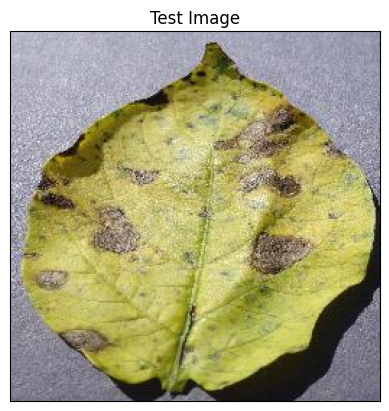

In [14]:
import cv2
image_path = 'test/test/PotatoEarlyBlight4.JPG'

# Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Displaying Image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [15]:
image  = tf.keras.preprocessing.image.load_img(image_path, target_size=[128,128])
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [16]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 368ms/step


(array([[6.9627699e-09, 4.3780517e-12, 9.0265857e-11, 9.1240687e-12,
         3.3768101e-12, 7.5359975e-11, 2.8578580e-13, 1.4496739e-09,
         1.4818409e-08, 3.2123828e-11, 2.0886613e-13, 6.1712251e-13,
         8.6164444e-12, 8.2694016e-05, 2.4268684e-12, 5.6382191e-11,
         3.7157231e-09, 1.5595735e-14, 1.6251256e-07, 2.4749430e-11,
         9.9991190e-01, 4.9048710e-11, 2.3644647e-11, 6.9920380e-12,
         8.5726801e-11, 2.0976685e-09, 2.1478598e-07, 2.8107058e-11,
         2.2196769e-10, 1.7418915e-07, 2.0218170e-07, 5.0737825e-10,
         4.6646228e-06, 3.9809025e-13, 7.4249455e-13, 2.8784326e-13,
         1.4298526e-13, 4.0137768e-10]], dtype=float32),
 (1, 38))

In [17]:
result_index = np.argmax(prediction)
result_index

20

In [18]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

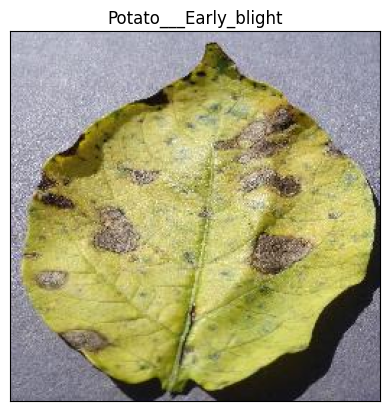

In [19]:
# Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(model_prediction)
plt.xticks([])
plt.yticks([])
plt.show()
